## **Analyzing data with Python**
**1- Understand the Data** 

**2- Load the Data** 

**3- Explore the Data** 

**4- Clean the Data** 

**5- Visualize the Data** 

**6- Perform Analysis** 

**7- Interpret Results** 

**8- Communicate Findings**

## **Load the Data**

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('Accommodation.csv')

## **Explore the Data**

In [2]:
# Display the first few rows
data.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressRegion.1,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Camping
1,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,Tags
2,Hideaway Camping and Caravan Park,NaN,+353(0)2822255,-9.260331,51.541699,Cork,Skibbereen,Camping
3,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,Tags
4,Hideaway Camping and Caravan Park,NaN,+353(0)2822256,-9.260331,51.541699,Cork,Skibbereen,Camping


In [3]:
# Get information about the columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             2339 non-null   object
 1   Url              2174 non-null   object
 2   Telephone        2335 non-null   object
 3   Longitude        2339 non-null   object
 4   Latitude         2339 non-null   object
 5   AddressRegion    2339 non-null   object
 6   AddressRegion.1  2178 non-null   object
 7   Tags             2339 non-null   object
dtypes: object(8)
memory usage: 146.3+ KB


In [4]:
# Check for missing values
data.isnull().sum()

Name                 0
Url                165
Telephone            4
Longitude            0
Latitude             0
AddressRegion        0
AddressRegion.1    161
Tags                 0
dtype: int64

## **Clean the Data**

In [5]:
# Fill missing values in the 'Telephone' column with a placeholder value
data['Telephone'].fillna('Not Available', inplace=True)

## **Visualize the Data**

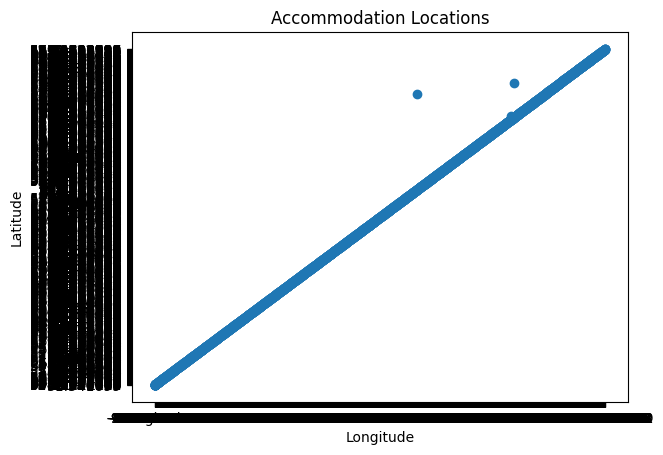

In [6]:
import matplotlib.pyplot as plt

# Plot latitude vs longitude
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accommodation Locations')
plt.show()

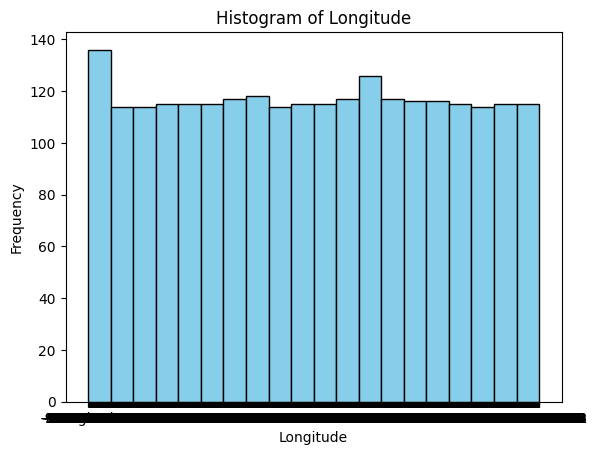

In [7]:
# Histogram of longitude
plt.hist(data['Longitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Print out the column names
print(data.columns)

Index(['Name', 'Url', 'Telephone', 'Longitude', 'Latitude', 'AddressRegion',
       'AddressRegion.1', 'Tags'],
      dtype='object')


## **Preform Analysis**

In [10]:
# Distribution of Accommodations by Region
region_counts = data['AddressRegion'].value_counts()
print("Distribution of Accommodations by Region:")
print(region_counts)

# Common Tags Associated with Accommodations
tags = data['Tags'].str.split(',').explode().str.strip()
tag_counts = tags.value_counts()
print("\nCommon Tags Associated with Accommodations:")
print(tag_counts.head(10))  # Display top 10 most common tags

# Summary Statistics
summary_stats = data[['Longitude', 'Latitude']].describe()
print("\nSummary Statistics for Longitude and Latitude:")
print(summary_stats)

Distribution of Accommodations by Region:
Kerry            302
Cork             256
Galway           243
Dublin           234
Donegal          178
Clare            156
Mayo             142
Wexford           82
Tipperary         72
Wicklow           72
Meath             61
Waterford         57
Limerick          57
Sligo             53
Kildare           50
Kilkenny          49
Cavan             40
Leitrim           37
Westmeath         35
Louth             34
Monaghan          24
Roscommon         24
Carlow            21
Offaly            21
Laois             20
AddressRegion     11
Longford           8
Name: AddressRegion, dtype: int64

Common Tags Associated with Accommodations:
Hotel                          810
B&B                            722
Self Catering Accommodation    512
Welcome Standard               495
Camping                        121
Guesthouse                     104
B&B Ireland                     77
Hostel                          73
Glamping                        

In [11]:
# Analyze telephone numbers
telephone_formats = data['Telephone'].apply(lambda x: len(str(x))).value_counts()
print("Distribution of Telephone Number Lengths:")
print(telephone_formats)

Distribution of Telephone Number Lengths:
16    811
8     569
15    381
14    236
11    215
10    112
9      11
13      4
Name: Telephone, dtype: int64


In [12]:
# Analyze tag frequencies
tag_counts = tags.value_counts()
print("Tag Frequencies:")
print(tag_counts)

Tag Frequencies:
Hotel                             810
B&B                               722
Self Catering Accommodation       512
Welcome Standard                  495
Camping                           121
Guesthouse                        104
B&B Ireland                        77
Hostel                             73
Glamping                           34
B&Bs                               28
Historic House                     28
Activity Holiday Accommodation     17
Tags                               11
Name: Tags, dtype: int64


In [13]:
# Analyze URLs
domain_counts = data['Url'].apply(lambda x: str(x).split('/')[2] if (pd.notnull(x) and len(str(x).split('/')) > 2) else None).value_counts()
print("Domain Frequencies:")
print(domain_counts)


Domain Frequencies:
www.facebook.com                 153
www.bandbireland.com              51
www.airbnb.ie                     22
www.loveconnemaracottages.com     16
twitter.com                       11
                                ... 
www.talbotcarlow.ie                1
www.coopershill.com                1
www.ospreyhotel.ie                 1
www.maldronhotelwexford.com        1
www.thecosycottage.com             1
Name: Url, Length: 1777, dtype: int64


In [14]:
# Extract top-level domains (TLDs)
tlds = data['Url'].apply(lambda x: str(x).split('.')[-1] if (pd.notnull(x) and len(str(x).split('.')) > 1) else None)
tld_counts = tlds.value_counts()
print("Top-Level Domain Frequencies:")
print(tld_counts)

Top-Level Domain Frequencies:
com                      746
com/                     330
ie                       313
ie/                      216
html                      45
                        ... 
com/abbeyglencastle        1
com/themaritime            1
com/MidletonParkHotel      1
com/TheInnatDromoland      1
teelin/                    1
Name: Url, Length: 468, dtype: int64


## **Communicate Findings Visualization** ##

 **Visualization for Distribution of Accommodations by Region** 

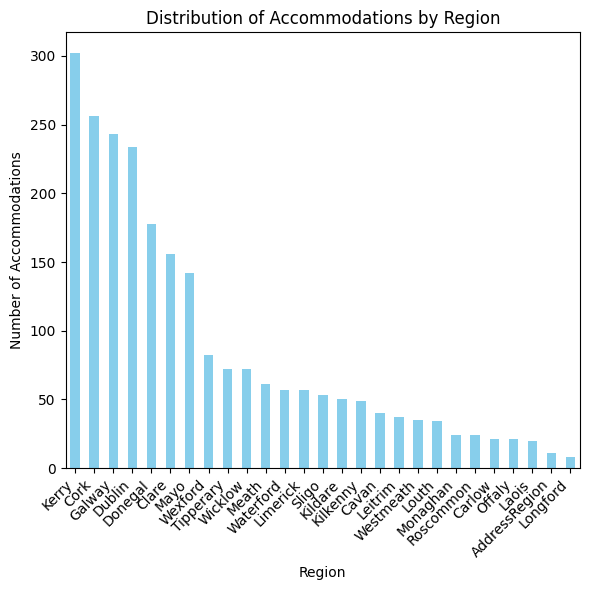

In [15]:
import matplotlib.pyplot as plt

# Plot distribution of accommodations by region
plt.figure(figsize=(6, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accommodations by Region')
plt.xlabel('Region')
plt.ylabel('Number of Accommodations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 **Visualization for Common Tags Associated with Accommodations**


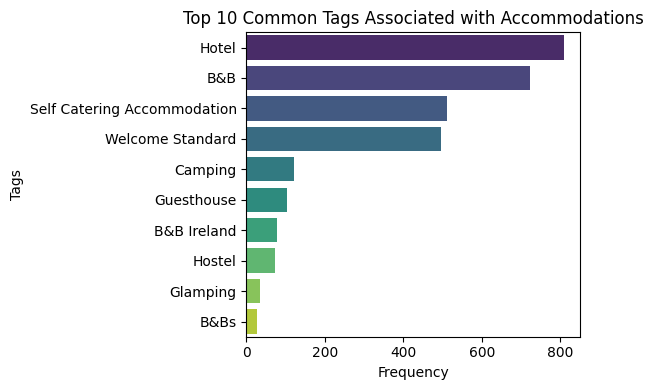

In [16]:
import seaborn as sns

# Plot common tags associated with accommodations
plt.figure(figsize=(6, 4))
sns.barplot(x=tag_counts.head(10).values, y=tag_counts.head(10).index, palette='viridis')
plt.title('Top 10 Common Tags Associated with Accommodations')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()


**Visualization for Top-Level Domain Frequencies**

C:\Users\Hp\AppData\Local\Temp\ipykernel_556\3313780294.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


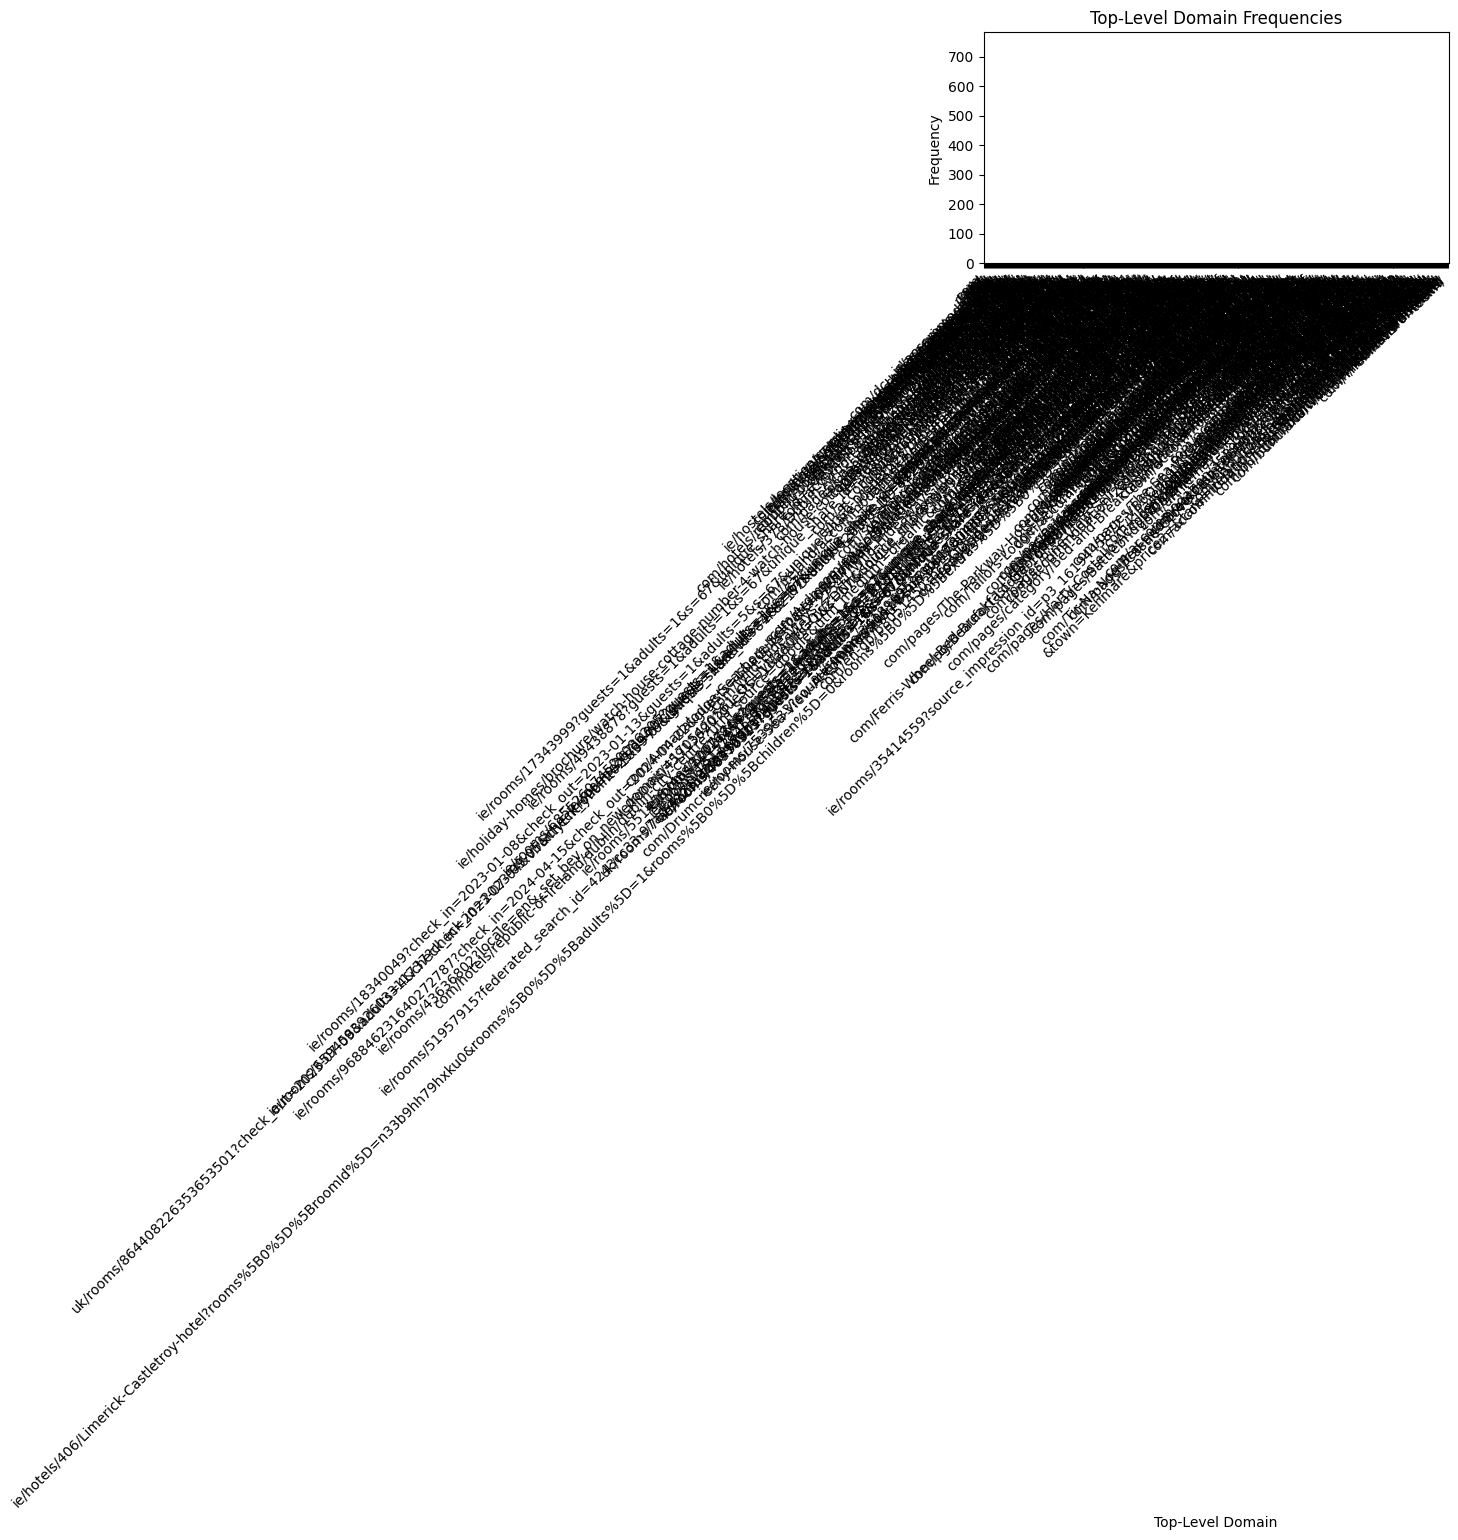

In [17]:
# Plot top-level domain frequencies
plt.figure(figsize=(6, 3))
tld_counts.plot(kind='bar', color='orange')
plt.title('Top-Level Domain Frequencies')
plt.xlabel('Top-Level Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()